# **Exploratory Data Analysis(EDA) on Student Lifestyle Dataset**

### **Introduction**

#### The purpose of this exploratory data analysis (EDA) project is to investigate the relationship between students' daily habits, lifestyle choices, academic performance, and stress levels. The dataset provides detailed information about students' routines, including hours spent on studying, extracurricular activities, sleep, socializing, and physical exercise, along with their Grade Point Average (GPA) and stress levels categorized as Low, Moderate, or High. By analyzing these variables, the project aims to uncover patterns and correlations that can offer insights into how various activities influence academic outcomes and stress. Additionally, the analysis seeks to identify significant trends and outliers that could help educators, policymakers, and students optimize academic performance while maintaining a healthy and balanced lifestyle. Through statistical analysis and data visualization, this study aspires to provide actionable recommendations for fostering student well-being and success.

### **Importing Libraries**

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **Importing dataset**

In [65]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/student_lifestyle_dataset.csv')

### **Analysing top 10 data**

In [66]:
df.head(10)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
5,6,6.0,2.1,8.0,0.3,7.6,2.85,Moderate
6,7,8.0,0.7,5.3,5.7,4.3,3.08,High
7,8,8.4,1.8,5.6,3.0,5.2,3.20,High
8,9,5.2,3.6,6.3,4.0,4.9,2.82,Low
9,10,7.7,0.7,9.8,4.5,1.3,2.76,Moderate


### **Analysing last 10 data**

In [67]:
df.tail(10)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1990,1991,8.6,3.8,9.2,2.2,0.2,3.26,High
1991,1992,6.3,1.5,5.1,3.1,8.0,3.21,High
1992,1993,7.5,2.1,9.9,4.1,0.4,3.04,Moderate
1993,1994,7.1,1.4,9.0,3.1,3.4,2.85,Moderate
1994,1995,7.9,3.4,9.0,0.5,3.2,3.08,Moderate
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High
1999,2000,9.0,1.7,7.3,3.1,2.9,3.58,High


### **Checking information**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


### **Checking null values**

In [69]:
df.isna().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


### **Checking duplicate rows**

In [70]:
df.duplicated().sum()

0

### **Mapping numerical values to categorical column**

In [71]:
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [72]:
mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Stress_Level_num'] = df['Stress_Level'].map(mapping)

### **Checking outlier using boxplot**

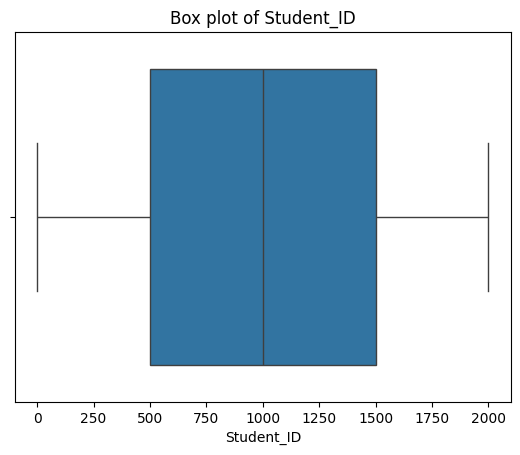

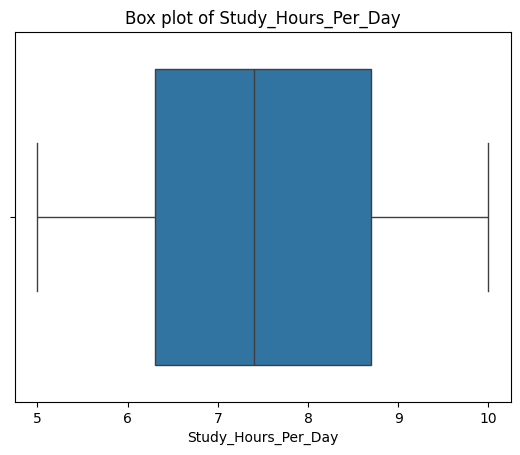

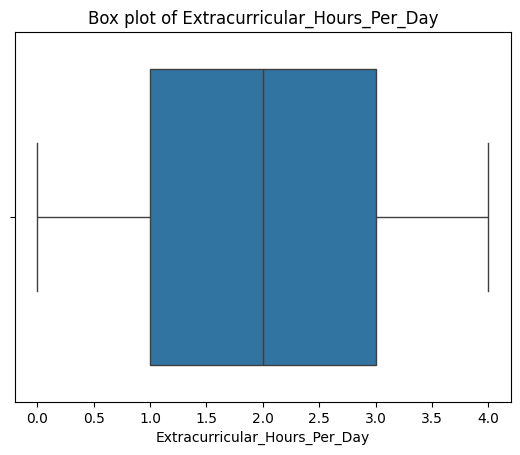

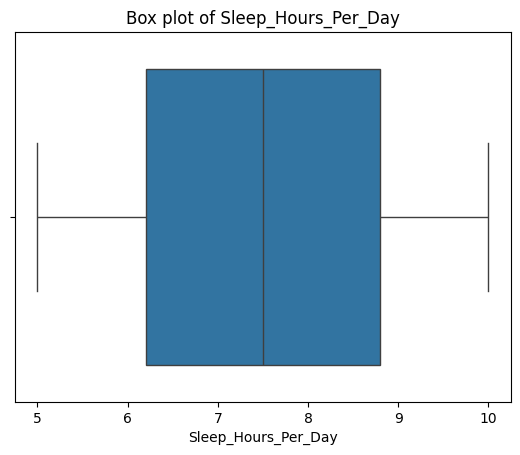

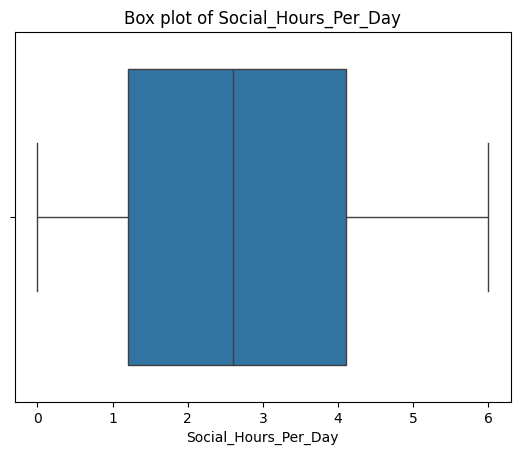

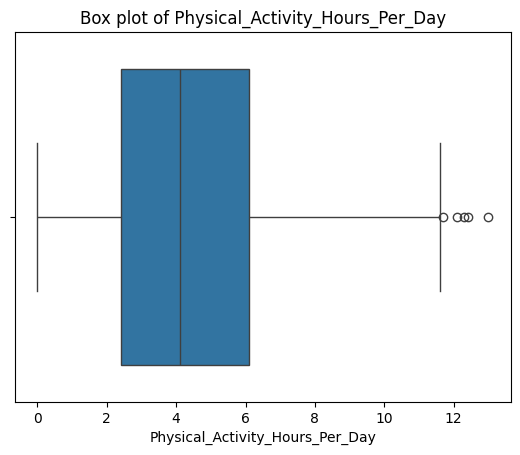

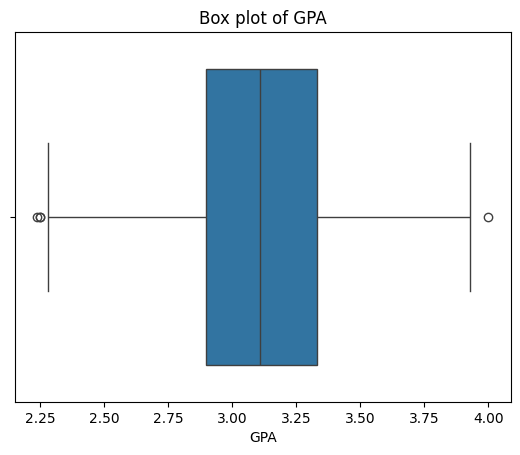

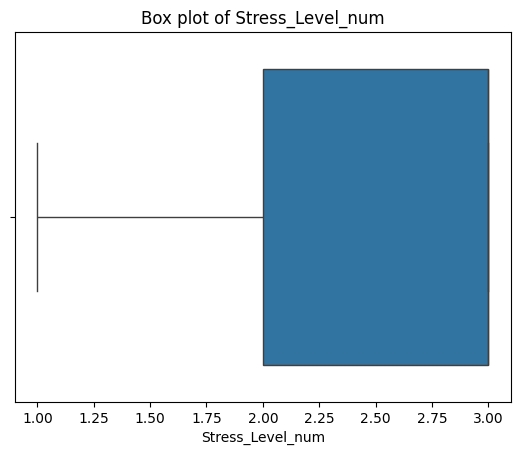

In [73]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(df, x = i)
    plt.title(f'Box plot of {i}')
    plt.show()

### **Removing outliers**

In [74]:
df = df[df['Physical_Activity_Hours_Per_Day'] < 10]
df = df[(df['GPA'] > 2.5) & (df['GPA'] < 3.75)]

### **Checking whether outliers are removed**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Student_ID'),
  Text(1, 0, 'Study_Hours_Per_Day'),
  Text(2, 0, 'Extracurricular_Hours_Per_Day'),
  Text(3, 0, 'Sleep_Hours_Per_Day'),
  Text(4, 0, 'Social_Hours_Per_Day'),
  Text(5, 0, 'Physical_Activity_Hours_Per_Day'),
  Text(6, 0, 'GPA'),
  Text(7, 0, 'Stress_Level_num')])

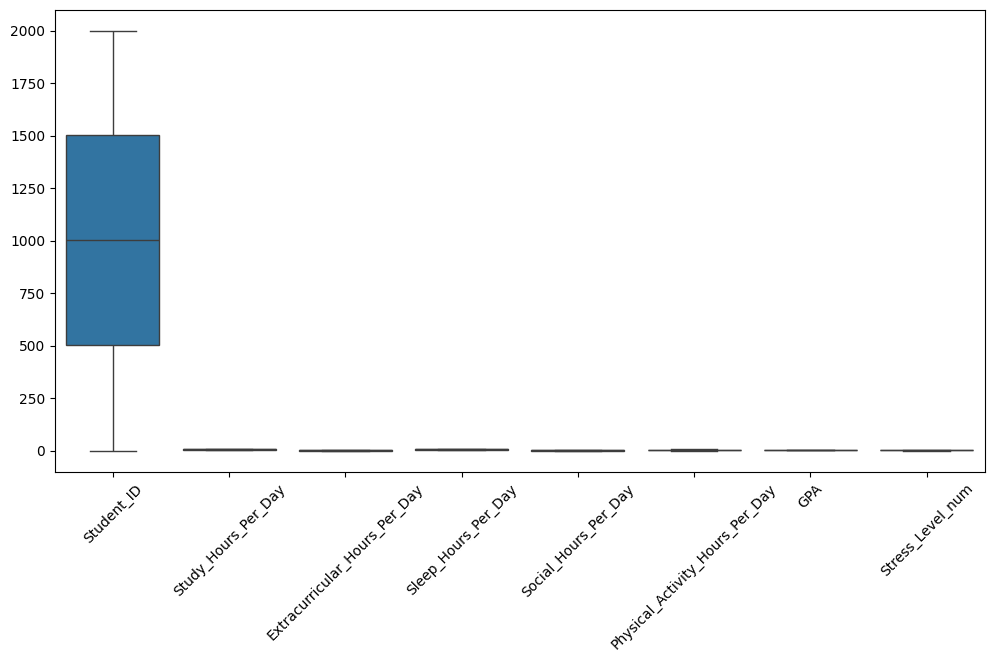

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.xticks(rotation = 45)

## **Statistical Analysis**

### Covariance

In [76]:
df.cov(numeric_only=True)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_num
Student_ID,332528.427850,7.533315,-17.356567,1.567099,-9.269436,17.525589,-0.574437,0.302742
Study_Hours_Per_Day,7.533315,1.957574,-0.028661,0.020066,-0.400355,-1.548623,0.276247,0.747703
Extracurricular_Hours_Per_Day,-17.356567,-0.028661,1.329213,-0.018795,-0.307207,-0.974548,-0.014147,-0.005888
Sleep_Hours_Per_Day,1.567099,0.020066,-0.018795,2.118444,-0.529782,-1.589933,-0.009535,-0.321096
Social_Hours_Per_Day,-9.269436,-0.400355,-0.307207,-0.529782,2.824052,-1.586707,-0.054238,-0.076282
Physical_Activity_Hours_Per_Day,17.525589,-1.548623,-0.974548,-1.589933,-1.586707,5.699811,-0.198327,-0.344437
GPA,-0.574437,0.276247,-0.014147,-0.009535,-0.054238,-0.198327,0.074866,0.107108
Stress_Level_num,0.302742,0.747703,-0.005888,-0.321096,-0.076282,-0.344437,0.107108,0.515297


### Correlation

In [77]:
df.corr(numeric_only=True)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_num
Student_ID,1.000000,0.009337,-0.026107,0.001867,-0.009565,0.012730,-0.003641,0.000731
Study_Hours_Per_Day,0.009337,1.000000,-0.017768,0.009854,-0.170275,-0.463614,0.721602,0.744459
Extracurricular_Hours_Per_Day,-0.026107,-0.017768,1.000000,-0.011201,-0.158562,-0.354059,-0.044848,-0.007114
Sleep_Hours_Per_Day,0.001867,0.009854,-0.011201,1.000000,-0.216597,-0.457552,-0.023943,-0.307324
Social_Hours_Per_Day,-0.009565,-0.170275,-0.158562,-0.216597,1.000000,-0.395485,-0.117957,-0.063235
Physical_Activity_Hours_Per_Day,0.012730,-0.463614,-0.354059,-0.457552,-0.395485,1.000000,-0.303606,-0.200979
GPA,-0.003641,0.721602,-0.044848,-0.023943,-0.117957,-0.303606,1.000000,0.545319
Stress_Level_num,0.000731,0.744459,-0.007114,-0.307324,-0.063235,-0.200979,0.545319,1.000000


### Heatmap

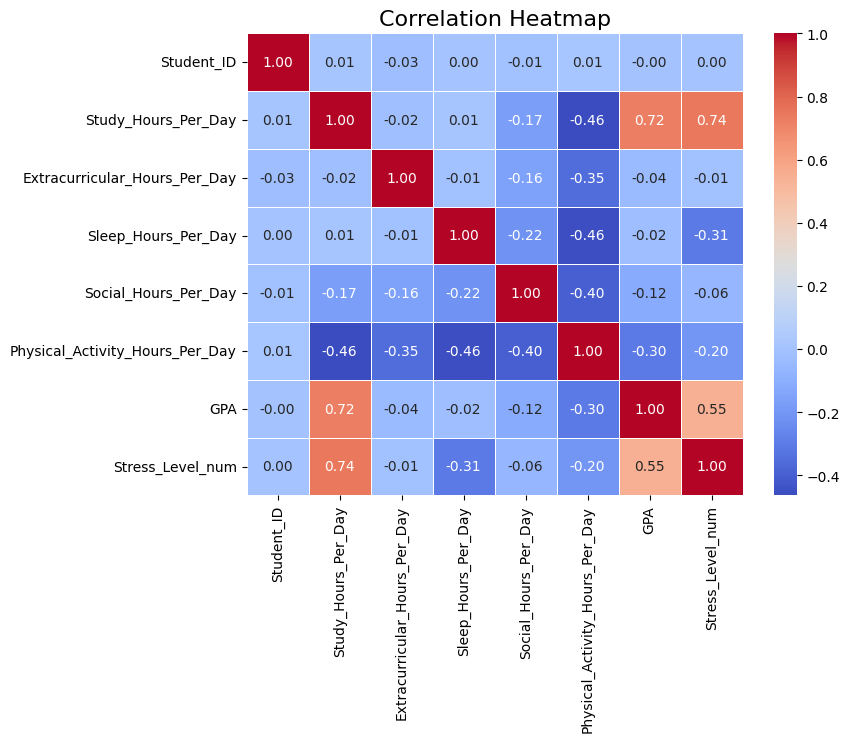

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True) , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [79]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_num
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,1002.845669,7.500105,2.005092,7.520262,2.734331,4.240210,3.120588,2.372178
std,576.652779,1.399133,1.152915,1.455488,1.680492,2.387428,0.273616,0.717842
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.000000,2.510000,1.000000
25%,503.000000,6.300000,1.000000,6.300000,1.300000,2.400000,2.910000,2.000000
50%,1006.000000,7.400000,2.000000,7.600000,2.600000,4.100000,3.110000,3.000000
75%,1503.000000,8.700000,3.000000,8.800000,4.200000,6.000000,3.320000,3.000000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,9.900000,3.740000,3.000000


## **Exploratory Data Analysis(EDA) Questions**

1. How do stress levels vary among students?

In [80]:
stress_dist = df.groupby('Stress_Level')['Student_ID'].count()
print(stress_dist)

Stress_Level
High        977
Low         268
Moderate    660
Name: Student_ID, dtype: int64


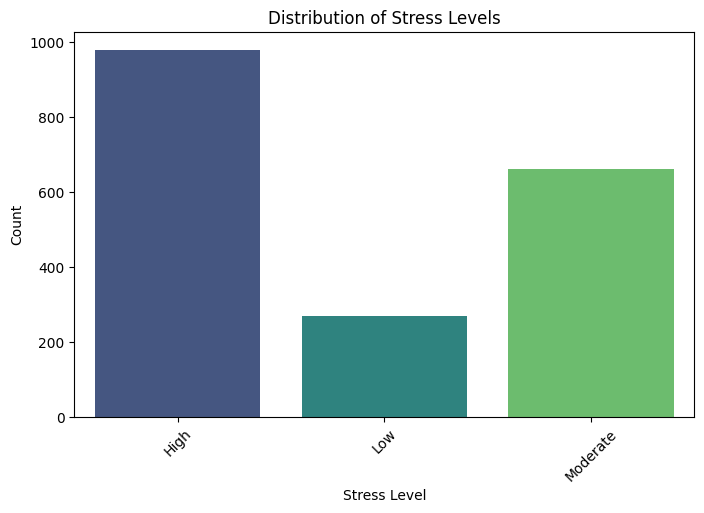

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(data = stress_dist, palette='viridis')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2. How does the average GPA change with increasing study hours per day?

In [82]:
study_hours_gpa = df.groupby('Study_Hours_Per_Day')['GPA'].mean().reset_index()
print(study_hours_gpa)

    Study_Hours_Per_Day       GPA
0                   5.0  2.784737
1                   5.1  2.788800
2                   5.2  2.833333
3                   5.3  2.809318
4                   5.4  2.819697
5                   5.5  2.843889
6                   5.6  2.850000
7                   5.7  2.916071
8                   5.8  2.866000
9                   5.9  2.893590
10                  6.0  2.889268
11                  6.1  2.876316
12                  6.2  2.924118
13                  6.3  2.968393
14                  6.4  2.954048
15                  6.5  2.952258
16                  6.6  3.010698
17                  6.7  3.018800
18                  6.8  2.976316
19                  6.9  3.067436
20                  7.0  2.986765
21                  7.1  3.104000
22                  7.2  3.056585
23                  7.3  3.139362
24                  7.4  3.109231
25                  7.5  3.118056
26                  7.6  3.124865
27                  7.7  3.136944
28            

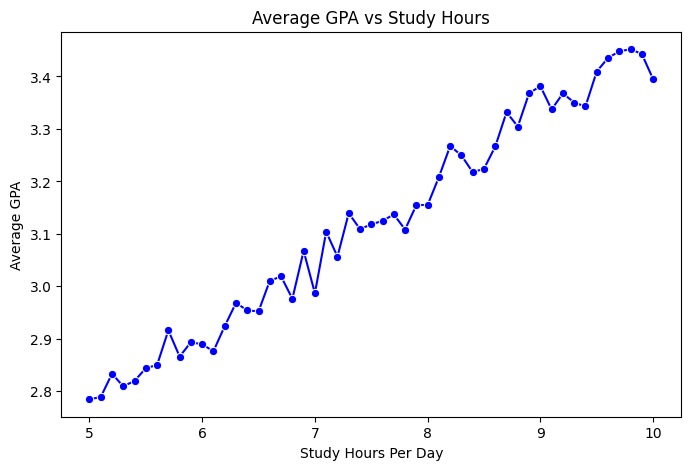

In [83]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Study_Hours_Per_Day', y='GPA', data=study_hours_gpa, marker='o', color='blue')
plt.title('Average GPA vs Study Hours')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Average GPA')
plt.show()

3. What is the distribution of GPA among students?

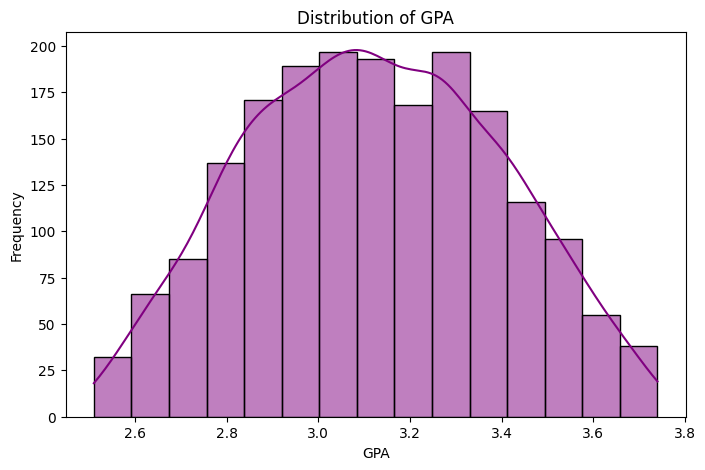

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GPA'], bins=15, kde=True, color='purple')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()



4. What percentage of students fall into each stress level category?

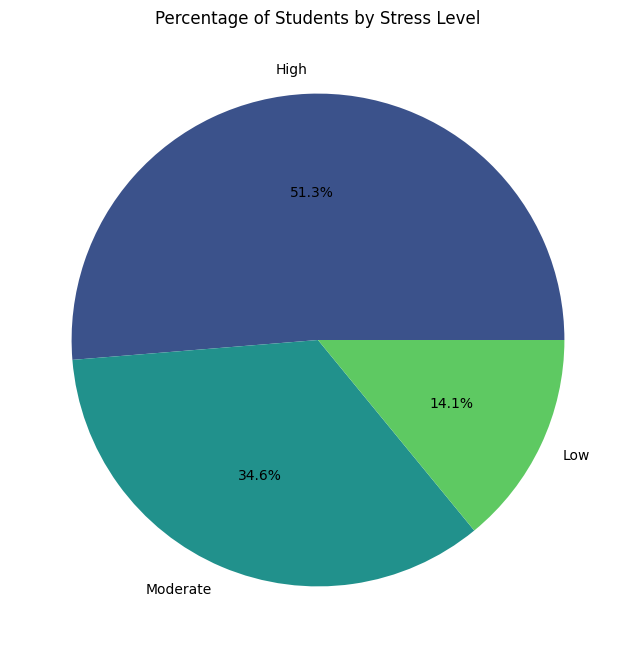

In [85]:
stress_counts = df['Stress_Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(stress_counts)))
plt.title('Percentage of Students by Stress Level')
plt.show()

5. What is the relationship between sleep hours and GPA?

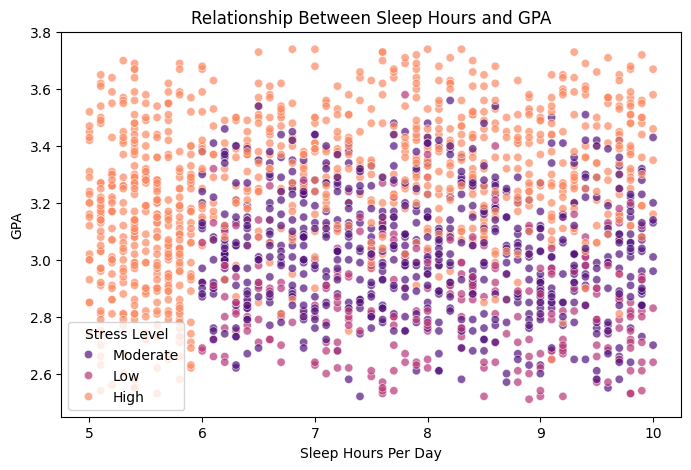

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='magma', alpha=0.7)
plt.title('Relationship Between Sleep Hours and GPA')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('GPA')
plt.legend(title='Stress Level')
plt.show()

6. How does GPA vary across different stress levels?

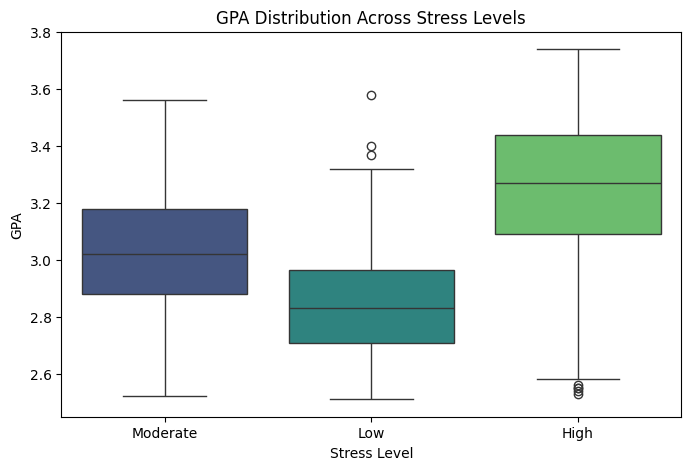

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='viridis')
plt.title('GPA Distribution Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.show()

7. What is the average GPA of the students?

In [88]:
df['GPA'].mean()

3.120587926509186

8. How many students have a stress level categorized as "High"?

In [89]:
df[df['Stress_Level'] == 'High'].shape[0]


977

9. Who are the top 5 students with the highest GPA?

In [90]:
df.sort_values(by='GPA', ascending=False).iloc[:5]

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Stress_Level_num
470,471,8.1,0.8,7.0,0.2,7.9,3.74,High,3
1658,1659,9.0,1.2,8.3,2.3,3.2,3.74,High,3
660,661,9.0,2.9,8.0,0.2,3.9,3.74,High,3
1490,1491,9.5,2.3,6.8,2.1,3.3,3.74,High,3
1636,1637,8.7,2.2,7.6,1.9,3.6,3.73,High,3


10. Is there a correlation between Study_Hours_Per_Day and GPA?

In [91]:
df['Study_Hours_Per_Day'].corr(df['GPA'])

0.7216021294132186

11. What is the average GPA for each stress level?

In [92]:
df.groupby('Stress_Level')['GPA'].mean()

,GPA
Stress_Level,
High,3.254872
Low,2.849179
Moderate,3.032015


12. What is the range of study hours per day?

In [93]:
df['Study_Hours_Per_Day'].min(), df['Study_Hours_Per_Day'].max()

(5.0, 10.0)

13. How many students study more than 8 hours per day and have a GPA above 3.5?

In [94]:
df[(df['Study_Hours_Per_Day'] > 8) & (df['GPA'] > 3.5)].shape[0]

166

## **Summary**

The exploratory data analysis (EDA) delves into how various lifestyle choices, habits, and stress levels influence students' academic performance. Initially, the dataset was examined for completeness and integrity, with missing values and duplicates identified and addressed. The conversion of categorical stress levels into numeric values enabled statistical analysis, and outlier removal ensured that the focus remained on representative data. The dataset spans key aspects of student life, such as study hours, sleep patterns, physical activity, and their impact on academic outcomes, as measured by GPA, offering a holistic view of student behavior.

A crucial aspect of the analysis involved understanding stress levels and their distribution among students. Bar charts and pie charts highlighted the percentage of students falling into "Low," "Moderate," and "High" stress categories, offering a clear perspective on how stress permeates the student population. Stress level correlations were further explored to determine their relationship with other factors like GPA, sleep, and study hours. Interestingly, students with lower stress levels generally had higher GPAs, suggesting that stress management might play a pivotal role in academic success. Additionally, the distribution of stress levels provided insights into how common high-stress conditions are among students, prompting the need for targeted interventions.

One of the primary focuses was the relationship between study habits and GPA. A detailed examination showed a positive correlation, with average GPAs increasing as study hours per day rose. A line plot depicting average GPA against study hours highlighted this trend, although diminishing returns were observed beyond certain thresholds. This finding underscores the importance of efficient study strategies over sheer quantity. Similarly, scatter plots revealed how sleep hours influenced GPA, with balanced sleep patterns correlating with better academic performance. This reinforces the need for a structured routine encompassing adequate rest alongside academic commitments.

The analysis also explored GPA trends among various subgroups. For instance, students with GPAs exceeding 3.5 were identified, and their characteristics analyzed, including their study habits, stress levels, and extracurricular activities. The dataset also helped uncover trends among outliers, such as those studying over 8 hours a day while maintaining high GPAs. Furthermore, box plots illustrated how GPA distributions varied across stress levels, revealing that lower stress categories had tighter and higher GPA distributions compared to those experiencing high stress.

Statistical and visual tools like correlation matrices and heatmaps were employed to analyze relationships between variables. These tools unveiled a moderate positive correlation between study hours and GPA, highlighting the importance of academic engagement. However, they also revealed weak or insignificant correlations between physical activity and GPA, suggesting that while exercise is critical for overall health, its direct influence on academic outcomes may be less pronounced. Additionally, the analysis highlighted potential confounding factors, such as the interplay between stress levels and study hours.

From a descriptive standpoint, the analysis provided valuable metrics such as the average GPA, range of study hours, and distribution of students across stress levels. Key subsets, such as high-performing students and those with high stress, were quantitatively profiled, offering actionable insights for educators and policymakers. For example, the top 5 students with the highest GPAs were identified, along with their specific attributes, providing a template for academic excellence.

Overall, the EDA underscores the complex interplay between lifestyle factors and academic performance. It highlights the importance of a balanced routine, where adequate study hours, sufficient sleep, and stress management collectively contribute to better outcomes. The findings pave the way for targeted interventions, including stress reduction programs and academic counseling, aimed at fostering student well-being and success. Further research with larger and more diverse datasets could help validate these findings and expand on the relationships uncovered in this analysis.